# Proyek Analisis Data: Air Quality Dataset
- Nama: Auliasari Citra S
- Email: citrasyamsuraa@gmail.com
- Id Dicoding: auliasarics

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara (PM2.5, PM10, SO2, NO2, CO, O3) di berbagai stasiun pengukuran sepanjang tahun?
- Bagaimana hubungan antara kondisi cuaca (suhu, tekanan udara, kelembaban, hujan, arah dan kecepatan angin) dengan kualitas udara?
- Bagaimana perbandingan kualitas udara antar stasiun pada waktu tertentu?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [2]:
# Mendapatkan current working directory
current_directory = os.getcwd()

In [3]:
# Mendefinisikan path folder data
data_folder = 'Downloads/Air-quality-dataset/'

In [4]:
# Mendefinisikan nama file
file_names = [
    'PRSA_Data_Wanshouxigong_20130301-20170228.csv',
    'PRSA_Data_Shunyi_20130301-20170228.csv',
    'PRSA_Data_Tiantan_20130301-20170228.csv',
    'PRSA_Data_Wanliu_20130301-20170228.csv',
    'PRSA_Data_Guanyuan_20130301-20170228.csv',
    'PRSA_Data_Gucheng_20130301-20170228.csv',
    'PRSA_Data_Huairou_20130301-20170228.csv',
    'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    'PRSA_Data_Changping_20130301-20170228.csv',
    'PRSA_Data_Dingling_20130301-20170228.csv',
    'PRSA_Data_Dongsi_20130301-20170228.csv',
    'PRSA_Data_Aotizhongxin_20130301-20170228.csv'
]

In [5]:
dataframes = {}

for file_name in file_names:
    file_path = os.path.join(current_directory, data_folder, file_name)
    dataframe_name = file_name.split('.')[0] + '_df'
    dataframes[dataframe_name] = pd.read_csv(file_path)
for dataframe_name, dataframe in dataframes.items():
    print(f"\n{dataframe_name}")
    print(dataframe.head())

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\ameli\\Downloads\\submission\\Downloads/Air-quality-dataset/PRSA_Data_Wanshouxigong_20130301-20170228.csv'

### Assessing Data

In [ ]:
for file_name in file_names:
    dataframe_name = file_name.split('.')[0] + '_df'
    df = dataframes[dataframe_name]
    
    print(f"\n{dataframe_name}")
    df.info()
    print(f"\nNaN Counts:\n{df.isna().sum()}")
    print(f"\nJumlah duplikasi: {df.duplicated().sum()}")
    print("\nDeskripsi Statistik:")
    print(df.describe())


PRSA_Data_Wanshouxigong_20130301-20170228_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

NaN Counts:
No       

### Cleaning Data

In [ ]:
# membersihkan missing value dengan mengisi kolom numeric dengan median dan kolom wd dengan forward fill
def clean_missing_values(dfs):
    for df_name, df in dfs.items():
        numeric_columns = df.select_dtypes(include=['number']).columns.difference(['No'])
        df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
        df['wd'].fillna(method='ffill', inplace=True)

if __name__ == "__main__":
    clean_missing_values(dataframes)

In [ ]:
# Menampilkan informasi mengenai missing values setiap DataFrame
null_counts = {}
for df_name, df in dataframes.items():
    if not df.empty:
        null_counts[df_name] = df.isna().sum()

if null_counts:
    print(pd.DataFrame(null_counts).transpose())
else:
    print()

                                              No  year  month  day  hour  \
PRSA_Data_Wanshouxigong_20130301-20170228_df   0     0      0    0     0   
PRSA_Data_Shunyi_20130301-20170228_df          0     0      0    0     0   
PRSA_Data_Tiantan_20130301-20170228_df         0     0      0    0     0   
PRSA_Data_Wanliu_20130301-20170228_df          0     0      0    0     0   
PRSA_Data_Guanyuan_20130301-20170228_df        0     0      0    0     0   
PRSA_Data_Gucheng_20130301-20170228_df         0     0      0    0     0   
PRSA_Data_Huairou_20130301-20170228_df         0     0      0    0     0   
PRSA_Data_Nongzhanguan_20130301-20170228_df    0     0      0    0     0   
PRSA_Data_Changping_20130301-20170228_df       0     0      0    0     0   
PRSA_Data_Dingling_20130301-20170228_df        0     0      0    0     0   
PRSA_Data_Dongsi_20130301-20170228_df          0     0      0    0     0   
PRSA_Data_Aotizhongxin_20130301-20170228_df    0     0      0    0     0   

           

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Menampilkan rata-rata (mean) untuk setiap parameter dalam setiap DataFrame
mean_values = {}
for df_name, df in dataframes.items():
    mean_values[df_name] = df.mean(numeric_only=True)
mean_df = pd.DataFrame(mean_values).transpose()
print(mean_df)

                                                   No        year    month  \
PRSA_Data_Wanshouxigong_20130301-20170228_df  17532.5  2014.66256  6.52293   
PRSA_Data_Shunyi_20130301-20170228_df         17532.5  2014.66256  6.52293   
PRSA_Data_Tiantan_20130301-20170228_df        17532.5  2014.66256  6.52293   
PRSA_Data_Wanliu_20130301-20170228_df         17532.5  2014.66256  6.52293   
PRSA_Data_Guanyuan_20130301-20170228_df       17532.5  2014.66256  6.52293   
PRSA_Data_Gucheng_20130301-20170228_df        17532.5  2014.66256  6.52293   
PRSA_Data_Huairou_20130301-20170228_df        17532.5  2014.66256  6.52293   
PRSA_Data_Nongzhanguan_20130301-20170228_df   17532.5  2014.66256  6.52293   
PRSA_Data_Changping_20130301-20170228_df      17532.5  2014.66256  6.52293   
PRSA_Data_Dingling_20130301-20170228_df       17532.5  2014.66256  6.52293   
PRSA_Data_Dongsi_20130301-20170228_df         17532.5  2014.66256  6.52293   
PRSA_Data_Aotizhongxin_20130301-20170228_df   17532.5  2014.6625

In [ ]:
# Menggabungkan seluruh data dalam satu DataFrame
combined_df = pd.concat(dataframes.values(), keys=dataframes.keys())
combined_df.reset_index(inplace=True)
print(combined_df)

                                             level_0  level_1     No  year  \
0       PRSA_Data_Wanshouxigong_20130301-20170228_df        0      1  2013   
1       PRSA_Data_Wanshouxigong_20130301-20170228_df        1      2  2013   
2       PRSA_Data_Wanshouxigong_20130301-20170228_df        2      3  2013   
3       PRSA_Data_Wanshouxigong_20130301-20170228_df        3      4  2013   
4       PRSA_Data_Wanshouxigong_20130301-20170228_df        4      5  2013   
...                                              ...      ...    ...   ...   
420763   PRSA_Data_Aotizhongxin_20130301-20170228_df    35059  35060  2017   
420764   PRSA_Data_Aotizhongxin_20130301-20170228_df    35060  35061  2017   
420765   PRSA_Data_Aotizhongxin_20130301-20170228_df    35061  35062  2017   
420766   PRSA_Data_Aotizhongxin_20130301-20170228_df    35062  35063  2017   
420767   PRSA_Data_Aotizhongxin_20130301-20170228_df    35063  35064  2017   

        month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3

In [ ]:
# Mengeksplorasi seluruh data
combined_df.describe()

,level_1,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17531.500000,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.273026,104.235659,15.642997,50.384959,1212.909829,56.925748,13.539869,1010.746005,2.491120,0.064416,1.729444
std,10122.116943,10122.116943,1.177198,3.448707,8.800102,6.922195,80.064127,91.123375,21.456742,34.714968,1134.271612,55.830557,11.430772,10.469428,13.787259,0.820626,1.245961
min,0.000000,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8765.750000,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,23.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17531.500000,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,26297.250000,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,35063.000000,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [ ]:
category_ranges = [
    'Sehat', 'Sedang', 'Tidak sehat', 'Berbahaya'
]

pm25_ranges = [12, 35.4, 150.4, float('inf')]
pm10_ranges = [54, 154, 254, float('inf')]
so2_ranges = [35, 75, 185, float('inf')]
no2_ranges = [53, 100, 360, float('inf')]
co_ranges = [4400, 9400, 12400, float('inf')]
o3_ranges = [54, 70, 85, float('inf')]

def categorize(value, ranges):
    for max_val in ranges:
        if value <= max_val:
            return ranges.index(max_val)
        
combined_df['Category'] = combined_df.apply(lambda row: category_ranges[max(
    categorize(row['PM2.5'], pm25_ranges),
    categorize(row['PM10'], pm10_ranges),
    categorize(row['SO2'], so2_ranges),
    categorize(row['NO2'], no2_ranges),
    # categorize(row['CO'], co_ranges),
    # categorize(row['O3'], o3_ranges),
)], axis=1)

In [ ]:
combined_df.sample(10)

,level_0,level_1,No,year,month,day,hour,PM2.5,PM10,SO2,...,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Category
374009,PRSA_Data_Dongsi_20130301-20170228_df,23369,23370,2015,10,30,17,26.0,65.0,5.0,...,400.0,44.0,12.4,1025.2,-5.2,0.0,SW,3.0,Dongsi,Sedang
139879,PRSA_Data_Wanliu_20130301-20170228_df,34687,34688,2017,2,13,7,104.0,149.0,30.0,...,3800.0,3.0,-3.0,1025.3,-11.3,0.0,NE,1.1,Wanliu,Tidak sehat
152473,PRSA_Data_Guanyuan_20130301-20170228_df,12217,12218,2014,7,23,1,59.0,89.0,8.0,...,900.0,41.0,23.3,999.4,21.0,0.0,WNW,0.0,Guanyuan,Tidak sehat
94046,PRSA_Data_Tiantan_20130301-20170228_df,23918,23919,2015,11,22,14,38.0,38.0,6.0,...,800.0,31.0,-3.6,1031.7,-4.9,1.2,SE,2.4,Tiantan,Tidak sehat
134747,PRSA_Data_Wanliu_20130301-20170228_df,29555,29556,2016,7,14,11,50.0,76.0,4.0,...,1000.0,66.0,30.8,1001.6,19.2,0.0,NE,1.7,Wanliu,Tidak sehat
160913,PRSA_Data_Guanyuan_20130301-20170228_df,20657,20658,2015,7,9,17,75.0,76.0,10.0,...,800.0,264.0,32.5,1006.0,16.3,0.0,ESE,2.5,Guanyuan,Tidak sehat
40647,PRSA_Data_Shunyi_20130301-20170228_df,5583,5584,2013,10,19,15,7.0,9.0,1.0,...,200.0,61.0,17.8,1021.0,-1.5,0.0,NNW,4.4,Shunyi,Sehat
169387,PRSA_Data_Guanyuan_20130301-20170228_df,29131,29132,2016,6,26,19,48.0,103.0,16.0,...,600.0,187.0,33.6,999.0,6.8,0.0,SSW,3.0,Guanyuan,Tidak sehat
28259,PRSA_Data_Wanshouxigong_20130301-20170228_df,28259,28260,2016,5,21,11,90.0,111.0,28.0,...,1100.0,167.0,25.4,1015.3,9.6,0.0,NNE,2.1,Wanshouxigong,Tidak sehat
37405,PRSA_Data_Shunyi_20130301-20170228_df,2341,2342,2013,6,6,13,127.0,129.0,5.0,...,400.0,2.0,19.3,1006.6,18.6,0.0,NNE,1.1,Shunyi,Tidak sehat


## Visualization & Explanatory Analysis

### Bagaimana tren kualitas udara (PM2.5, PM10, SO2, NO2, CO, O3) di berbagai stasiun pengukuran sepanjang tahun? 

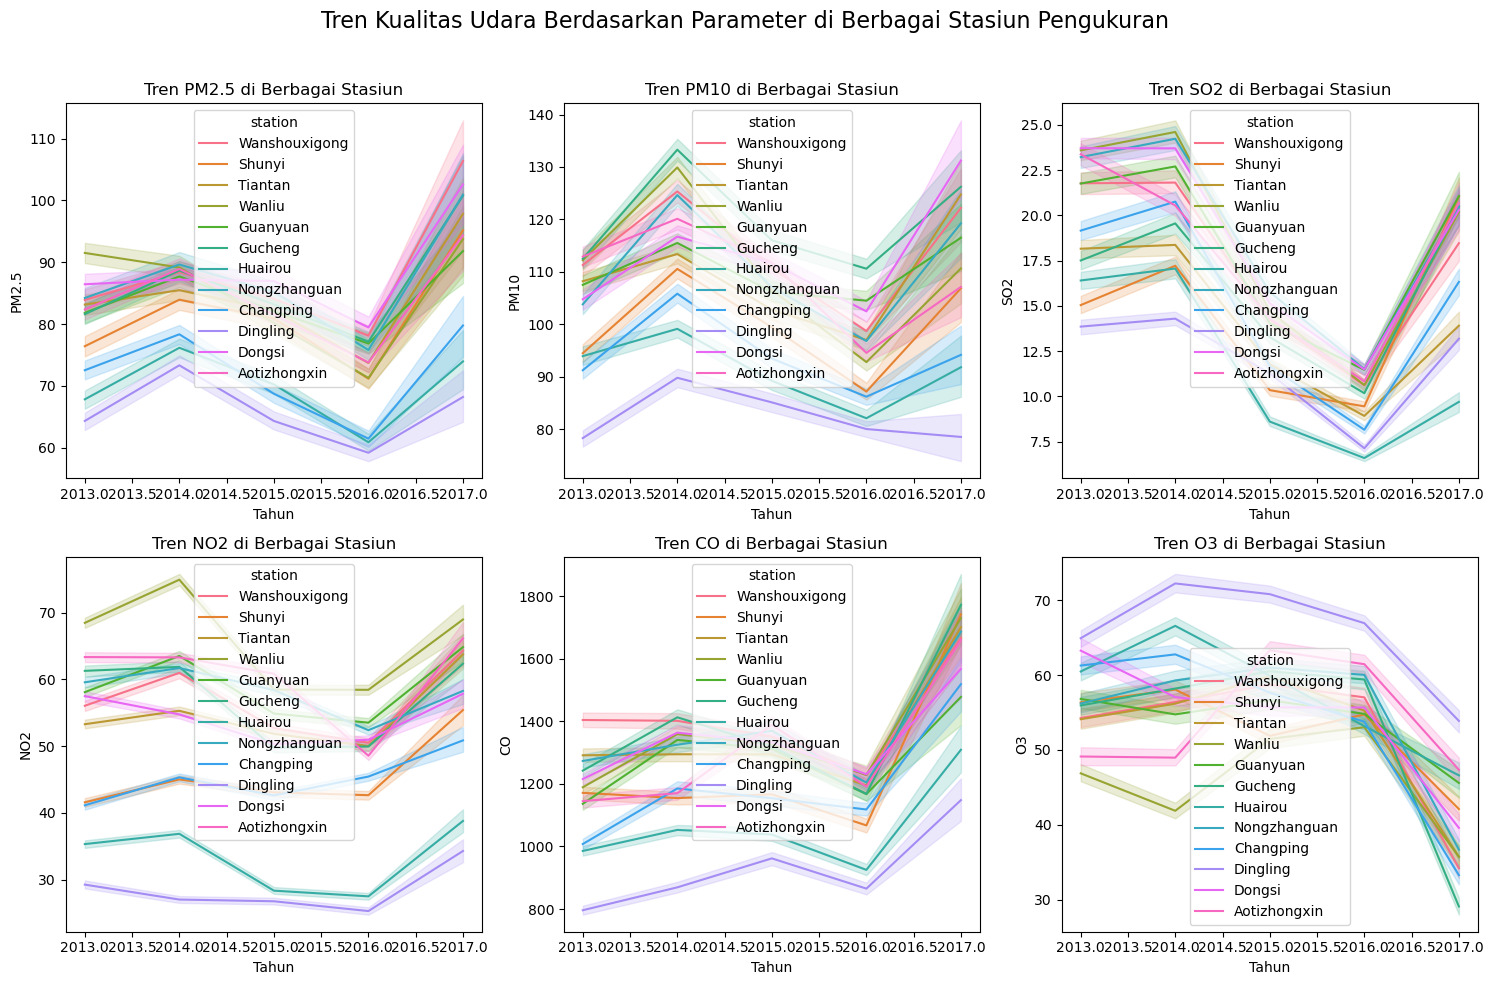

In [ ]:
parameter_ranges = {
    'PM2.5': pm25_ranges,
    'PM10': pm10_ranges,
    'SO2': so2_ranges,
    'NO2': no2_ranges,
    'CO': co_ranges,
    'O3': o3_ranges,
}

# Visualisasi tren kualitas udara berdasarkan parameter di berbagai stasiun pengukuran
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Tren Kualitas Udara Berdasarkan Parameter di Berbagai Stasiun Pengukuran', fontsize=16)

for ax, (param, ranges) in zip(axes.flatten(), parameter_ranges.items()):
    sns.lineplot(data=combined_df, x='year', y=param, hue='station', ax=ax)
    ax.set_title(f'Tren {param} di Berbagai Stasiun')
    ax.set_xlabel('Tahun')
    ax.set_ylabel(param)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Bagaimana hubungan antara kondisi cuaca (suhu, tekanan udara, kelembaban, hujan, arah dan kecepatan angin) dengan kualitas udara?

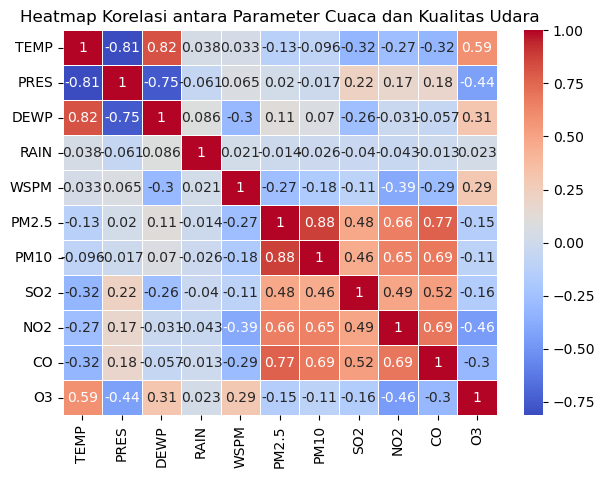

In [ ]:
# Visualisasi heatmap korelasi antara parameter cuaca dan kualitas udara
merged_df = pd.concat(dataframes.values(), ignore_index=True)

weather_columns = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
air_quality_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

correlation_matrix = merged_df[weather_columns + air_quality_columns].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap Korelasi antara Parameter Cuaca dan Kualitas Udara')
plt.show()

### Bagaimana perbandingan kualitas udara antar stasiun pada tahun 2015 hingga tahun2017?

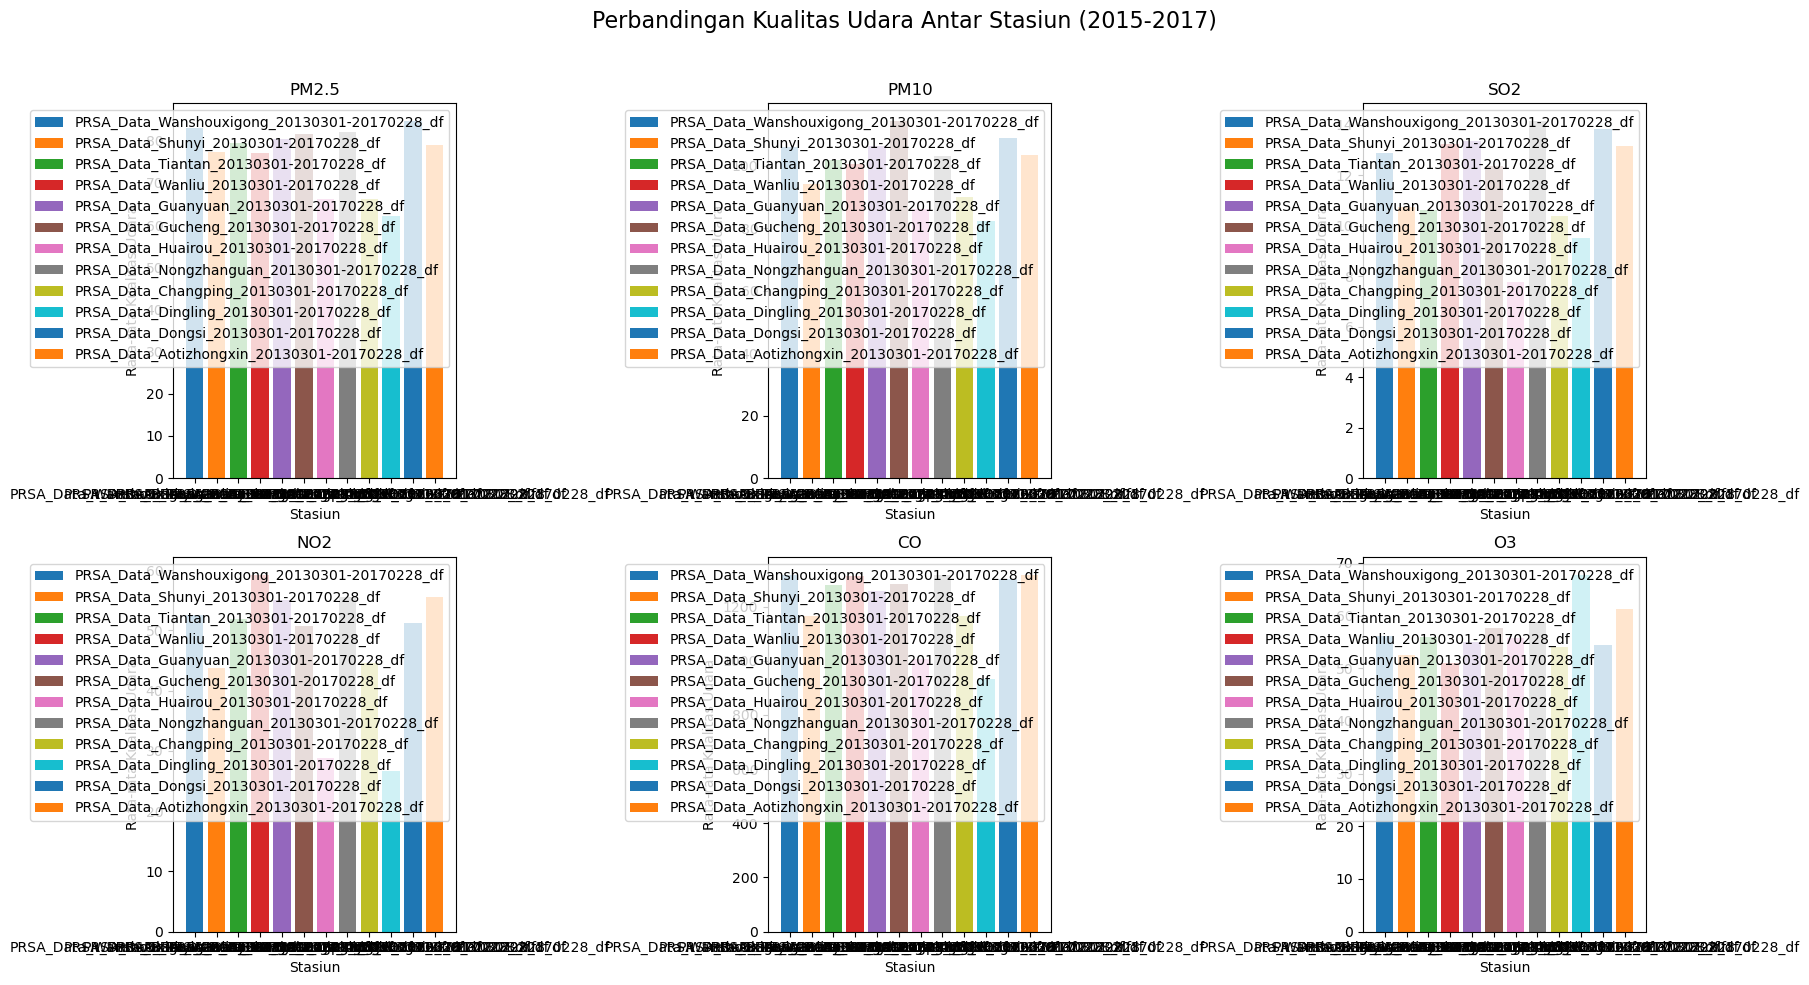

In [ ]:
# Analisis perbandingan kualitas udara antar stasiun untuk periode tertentu
start_year = 2015
end_year = 2017

air_quality_parameters = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle(f'Perbandingan Kualitas Udara Antar Stasiun ({start_year}-{end_year})', fontsize=16)

for i, parameter in enumerate(air_quality_parameters):
    row = i // 3
    col = i % 3

    axs[row, col].set_title(parameter)
    
    for station, df in dataframes.items():
        filtered_data = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
        axs[row, col].bar(station, filtered_data[parameter].mean(), label=station)

    axs[row, col].set_xlabel('Stasiun')
    axs[row, col].set_ylabel('Rata-rata Kualitas Udara')
    axs[row, col].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Conclusion

- Bagaimana tren kualitas udara (PM2.5, PM10, SO2, NO2, CO, O3) di berbagai stasiun pengukuran sepanjang tahun?
Berdasarkan hasil yang diperoleh terdapat peningkatan polusi PM2.5, PM10, SO2, NO2, CO dari tahun 2013 hingga 2017. Puncaknya pada tahun 2016 ke tahun 2017. Namun untuk O3 terjadi penurunan pada tahun 2016 ke tahun 2017.

- Bagaimana hubungan antara kondisi cuaca (suhu, tekanan udara, kelembaban, hujan, arah dan kecepatan angin) dengan kualitas udara? 
Parameter cuaca memiliki pengaruh yang signifikan terhadap kualitas udara. Suhu dan kelembaban udara memiliki korelasi positif yang kuat, yang berarti bahwa semakin tinggi suhu dan kelembaban udara, semakin tinggi pula konsentrasi PM2.5 dan PM10 di udara. Tekanan udara dan kecepatan angin memiliki korelasi negatif yang kuat, yang berarti bahwa semakin tinggi tekanan udara dan kecepatan angin, semakin rendah pula konsentrasi PM2.5 dan PM10 di udara. Curah hujan memiliki korelasi negatif yang lemah, yang berarti bahwa semakin tinggi curah hujan, semakin rendah pula konsentrasi PM2.5 dan PM10 di udara.

- Bagaimana perbandingan kualitas udara antar stasiun pada waktu 2015 hingga 2017?
Rata-rata kualitas udara di semua stasiun adalah buruk. Stasiun dengan kualitas udara terburuk adalah Wanshouxigong, Shunyi, dan Tiantan, ketiga stasiun ini terletak di kota-kota besar. Sedangkan, stasiun dengan kualitas udara terbaik adalah Guanyuan, Gucheng, dan Huairou. Ketiga stasiun ini terletak di daerah pedesaan. Perbedaan yang cukup signifikan ini kemungkinan dipengaruhi oleh konsentrasi kendaraan bermotor yang lebih rendah, aktivitas industri yang lebih rendah dan pembakaran bahan bakar fosil yang lebih rendah.

## Export Dataset

In [ ]:
# Menyimpan DataFrame yang telah diolah ke dalam file CSV
combined_df.to_csv('data_air_quality.csv', index=False)

In [ ]:
# Membaca kembali DataFrame dari file CSV yang disimpan
combined_df = pd.read_csv('data_air_quality.csv')
combined_df

,level_0,level_1,No,year,month,day,hour,PM2.5,PM10,SO2,...,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Category
0,PRSA_Data_Wanshouxigong_20130301-20170228_df,0,1,2013,3,1,0,9.0,9.0,6.0,...,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong,Sehat
1,PRSA_Data_Wanshouxigong_20130301-20170228_df,1,2,2013,3,1,1,11.0,11.0,7.0,...,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong,Sehat
2,PRSA_Data_Wanshouxigong_20130301-20170228_df,2,3,2013,3,1,2,8.0,8.0,8.0,...,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong,Sehat
3,PRSA_Data_Wanshouxigong_20130301-20170228_df,3,4,2013,3,1,3,8.0,8.0,3.0,...,1000.0,42.0,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong,Sehat
4,PRSA_Data_Wanshouxigong_20130301-20170228_df,4,5,2013,3,1,4,8.0,8.0,3.0,...,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong,Sehat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,PRSA_Data_Aotizhongxin_20130301-20170228_df,35059,35060,2017,2,28,19,12.0,29.0,5.0,...,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin,Sehat
420764,PRSA_Data_Aotizhongxin_20130301-20170228_df,35060,35061,2017,2,28,20,13.0,37.0,7.0,...,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin,Sedang
420765,PRSA_Data_Aotizhongxin_20130301-20170228_df,35061,35062,2017,2,28,21,16.0,37.0,10.0,...,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin,Sedang
420766,PRSA_Data_Aotizhongxin_20130301-20170228_df,35062,35063,2017,2,28,22,21.0,44.0,12.0,...,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin,Sedang
